# **Importing all the required libraries**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# **importing seaborn for accessing a specific dataset**

In [2]:
import seaborn as sns

# **reading the dataset**

In [3]:
df = sns.load_dataset('mpg')    #miles per gallon
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# **1. Ungrouped Frequency (used to handle categorical values)**

# **to check the no rows & columns present in the dataset**

In [4]:
df.shape   # (rows, columns)

(398, 9)

# **How many ditinct values of countries are there in the origin column?**

In [5]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

# **Find the no of occurrences of each country?**

# **Approach 1 : using nested for loops**

In [6]:
for name in df['origin'].unique():
  count = 0
  for i in df['origin']:
    if(i == name):
      count += 1
  print(name, ":", count)

usa : 249
japan : 79
europe : 70


# **Approach 2 : using built in functions**

In [7]:
df['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

# **Approach 3 : Storing the values in a new data frame**

In [8]:
pd.crosstab(df['origin'], 'No of cars')

col_0,No of cars
origin,
europe,70
japan,79
usa,249


# **creating a bar diagram using this information**

<Axes: xlabel='origin'>

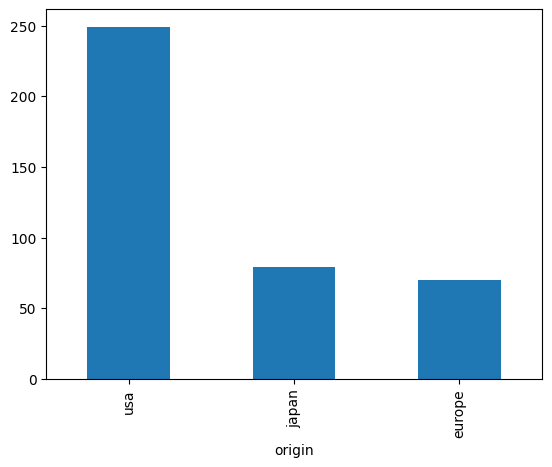

In [9]:
df['origin'].value_counts().plot(kind = 'bar')

# **creating a pie chart using this information**

<Axes: ylabel='count'>

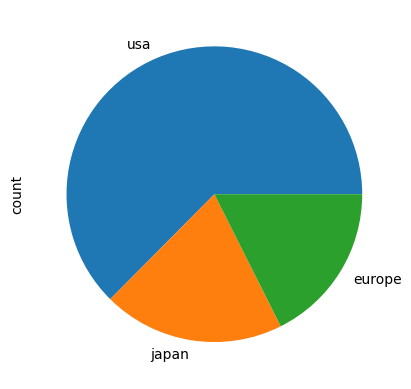

In [10]:
df['origin'].value_counts().plot(kind = 'pie')

# **adding percentage in the pie chart**

<Axes: ylabel='count'>

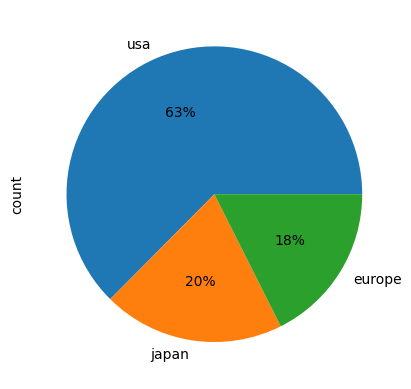

In [11]:
df['origin'].value_counts().plot(kind = 'pie', autopct = '%1.f%%')

# **What are the distinct values of cylinders ?**

In [12]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5])

# **counting the no of occurrences for each cylinders**

In [13]:
df['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

# **creating a bar diagram for cylinders**

<Axes: xlabel='cylinders'>

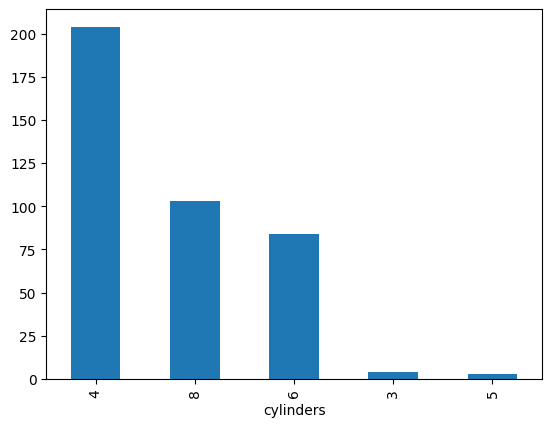

In [14]:
df['cylinders'].value_counts().plot(kind = 'bar')

# **dataframe using two columns**

In [15]:
pd.crosstab(df['origin'], df['cylinders'])   # No of 4 cylinders cars in europe : 63

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


# **Further classification of Ungrouped frequency : Relative Frequency & Percentage Frequency**

# **a. Relative Frequency (how much a value is covering in the dataset)**

In [16]:
#creating a dataframe
cars_in_country = pd.crosstab(df['origin'], 'Number of cars')

#adding a new column in the dataframe
cars_in_country['relative_freq'] = cars_in_country['Number of cars'] / cars_in_country['Number of cars'].sum()

#printing the dataframe
cars_in_country

col_0,Number of cars,relative_freq
origin,,
europe,70,0.175879
japan,79,0.198492
usa,249,0.625628


# **b. Percentage Frequency = Relative Frequency x 100**

In [17]:
cars_in_country

col_0,Number of cars,relative_freq
origin,,
europe,70,0.175879
japan,79,0.198492
usa,249,0.625628


In [18]:
#adding one more column in the dataframe
cars_in_country['Percentage_freq'] = cars_in_country['relative_freq'] * 100

#printing the whole dataframe
cars_in_country

col_0,Number of cars,relative_freq,Percentage_freq
origin,,,
europe,70,0.175879,17.587940
japan,79,0.198492,19.849246
usa,249,0.625628,62.562814


# **2. Grouped Frequency**

In [19]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


In [20]:
df['displacement'].value_counts()   #giving the no of occurrences of all the values present in the col

displacement
97.0     21
98.0     18
350.0    18
318.0    17
250.0    17
         ..
104.0     1
110.0     1
130.0     1
111.0     1
144.0     1
Name: count, Length: 82, dtype: int64

# **but as the no of items are very much, let's group them together within a range and find the no of frequencies. So let's apply grouped frequency in the displacement column**

In [21]:
df['displacement'].value_counts(bins = 5)    # it'll create 5 different range intervals between the lowest and lasrgest value

displacement
(67.612, 145.4]    196
(300.2, 377.6]      73
(222.8, 300.2]      60
(145.4, 222.8]      44
(377.6, 455.0]      25
Name: count, dtype: int64

# **let's plot this in a horizontal bar diagram**

<Axes: ylabel='displacement'>

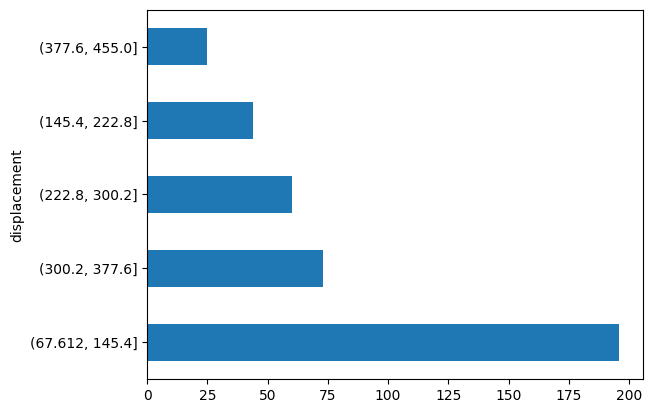

In [22]:
df['displacement'].value_counts(bins = 5).plot(kind = 'barh')

In [23]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


In [24]:
df['weight'].value_counts()

weight
1985    4
2130    4
2125    3
2945    3
2265    3
       ..
2875    1
3102    1
3664    1
2807    1
2625    1
Name: count, Length: 351, dtype: int64

# **So again let's apply on weight**

In [25]:
df['weight'].value_counts(bins = 5)

weight
(1609.472, 2318.4]    121
(2318.4, 3023.8]      113
(3023.8, 3729.2]       77
(3729.2, 4434.6]       63
(4434.6, 5140.0]       24
Name: count, dtype: int64

<Axes: ylabel='weight'>

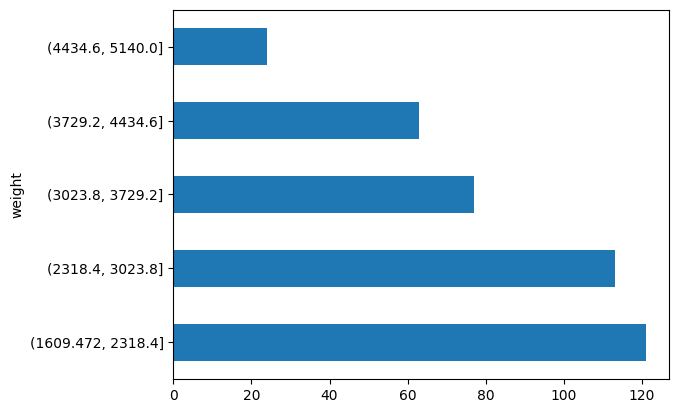

In [26]:
df['weight'].value_counts(bins = 5).plot(kind = 'barh')

# **for numeric data we usually go for Grouped Frequency & for categorical data we usually go for Ungrouped Frequency**